Roll:no:225229106

# Lab 5: Diabetes Classification Using Logistic Regression

# Step:1 [Understand data]

In [1]:
import pandas as pd

In [2]:
fl=pd.read_csv("diabetes.csv")

In [3]:
fl.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
fl.shape

(768, 9)

In [5]:
fl.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
type(fl)

pandas.core.frame.DataFrame

In [7]:
fl.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [8]:
fl.value_counts

<bound method DataFrame.value_counts of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0

# step:2 [Build Logistic Regression Model]

In [9]:
X=fl.drop('Outcome',axis=1)

In [10]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
y=fl['Outcome'].values

In [12]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
s=StratifiedShuffleSplit(n_splits=4,test_size=0.25,random_state=42)

In [14]:
s.get_n_splits(X,y)

4

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=.25,random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2',C=10.0)
lr=lr.fit(X_train,y_train)

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

# step:3 [predict on a new sample]

In [18]:
new=lr.predict([[6,200,90,10,25,23.3,.672,42]])
if new==0:
    print("Non_diabetic patient",new)
else:
    print("Diabetic patient",new)

Diabetic patient [1]


E:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# step:3 [Compute Classification Metrics]

Accuraccy

In [19]:
def accuracy(actual,pred):
    return sum(actual==pred)/float(actual.shape[0])

In [20]:
accuracy_score=accuracy(y_test,y_pred)
accuracy_score

0.7291666666666666

Precision

In [21]:
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred))

0.6363636363636364


Recall

In [22]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred))

0.5223880597014925


AUC scores

In [23]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))

0.6811940298507462


# step:4 [Understand Correlation]

In [24]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)
cf

array([[105,  20],
       [ 32,  35]], dtype=int64)

<AxesSubplot:>

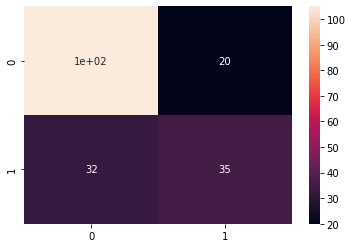

In [25]:
import seaborn as sns
sns.heatmap(cf, annot=True)

# step:5 [normalization using minmaxscaler and rebuid LoR]

In [26]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm_X_train=mm.fit_transform(X_train)
mm_X_train

array([[0.05882353, 0.6080402 , 0.63934426, ..., 0.58122206, 0.07884187,
        0.11666667],
       [0.70588235, 0.44221106, 0.60655738, ..., 0.52608048, 0.13095768,
        0.45      ],
       [0.05882353, 0.54271357, 0.49180328, ..., 0.5290611 , 0.14743875,
        0.05      ],
       ...,
       [0.05882353, 0.48743719, 0.57377049, ..., 0.56780924, 0.0596882 ,
        0.15      ],
       [0.52941176, 0.7839196 , 0.70491803, ..., 0.51117735, 0.4922049 ,
        0.35      ],
       [0.23529412, 0.72361809, 0.47540984, ..., 0.43964232, 0.09042316,
        0.26666667]])

In [27]:
mm_X_test=mm.transform(X_test)
mm_X_test

array([[0.76470588, 0.52261307, 0.59016393, ..., 0.46497765, 0.16971047,
        0.28333333],
       [0.23529412, 0.63819095, 0.72131148, ..., 0.51415797, 0.22895323,
        0.11666667],
       [0.11764706, 0.47236181, 0.62295082, ..., 0.4709389 , 0.25167038,
        0.03333333],
       ...,
       [0.        , 0.53266332, 0.57377049, ..., 0.58718331, 0.23207127,
        0.01666667],
       [0.29411765, 0.62311558, 0.60655738, ..., 0.50670641, 0.06057906,
        0.28333333],
       [0.17647059, 0.64321608, 0.59016393, ..., 0.4828614 , 0.20712695,
        0.1       ]])

In [28]:
mm_lor=LogisticRegression()
mm_lor=mm_lor.fit(mm_X_train,y_train)

In [29]:
mm_y_pred=mm_lor.predict(mm_X_test)
mm_y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

Accuracy

In [30]:
def accuracy(actual,pred):
    return sum(actual==pred)/float(actual.shape[0])

In [31]:
accuracy_score=accuracy(y_test,mm_y_pred)
accuracy_score

0.7447916666666666

Precision

In [32]:
print(precision_score(y_test,mm_y_pred))

0.6875


Recall

In [33]:
print(recall_score(y_test,mm_y_pred))

0.4925373134328358


AUC scores

In [34]:
print(roc_auc_score(y_test,mm_y_pred))

0.6862686567164178


# step:6 [Normalization using StandardScaler and rebuild LoR]

In [35]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss_X_train=ss.fit_transform(X_train)
ss_X_train

array([[-0.85547074,  0.00732864,  0.47259835, ...,  0.88301955,
        -0.65845729, -0.46648591],
       [ 2.46780492, -1.03224482,  0.2585074 , ...,  0.41193433,
        -0.30699915,  1.21865604],
       [-0.85547074, -0.4022003 , -0.49081095, ...,  0.43739839,
        -0.19585426, -0.8035143 ],
       ...,
       [-0.85547074, -0.74872478,  0.04441644, ...,  0.76843126,
        -0.78762567, -0.29797171],
       [ 1.56145701,  1.10990656,  0.90078026, ...,  0.28461399,
         2.12917653,  0.71311346],
       [ 0.05087717,  0.73187984, -0.59785643, ..., -0.3265236 ,
        -0.58035548,  0.29182797]])

In [36]:
ss_X_test=ss.transform(X_test)
ss_X_test

array([[ 2.76992089, -0.5282092 ,  0.15146192, ..., -0.11007904,
        -0.04565848,  0.37608507],
       [ 0.05087717,  0.196342  ,  1.00782574, ...,  0.31007806,
         0.35386232, -0.46648591],
       [-0.55335477, -0.84323146,  0.36555287, ..., -0.0591509 ,
         0.50706202, -0.8877714 ],
       ...,
       [-1.15758671, -0.46520475,  0.04441644, ...,  0.93394769,
         0.37488973, -0.97202849],
       [ 0.35299314,  0.10183532,  0.2585074 , ...,  0.24641789,
        -0.78161784,  0.37608507],
       [-0.2512388 ,  0.22784423,  0.15146192, ...,  0.04270536,
         0.20667045, -0.55074301]])

In [37]:
ss_lor=LogisticRegression()
ss_lor=ss_lor.fit(ss_X_train,y_train)

In [38]:
ss_y_pred=ss_lor.predict(ss_X_test)
ss_y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

Accuracy

In [39]:
def accuracy(actual,pred):
    return sum(actual==pred)/float(actual.shape[0])

In [40]:
accuracy_score=accuracy(y_test,ss_y_pred)
accuracy_score

0.734375

Precision

In [41]:
print(precision_score(y_test,ss_y_pred))

0.6481481481481481


Recall

In [42]:
print(recall_score(y_test,ss_y_pred))

0.5223880597014925


AUC scores

In [43]:
auc_ss=print(roc_auc_score(y_test,ss_y_pred))

0.6851940298507463


# Step:7 [plot ROC curve]

In [44]:
pred_prob1=mm_lor.predict_proba(mm_X_test)

In [45]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

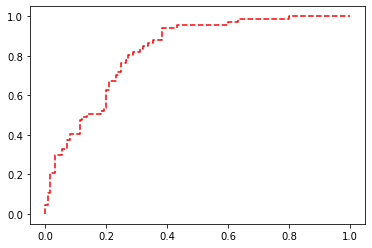

In [46]:
import matplotlib.pyplot as plt
plt.plot(fpr1,tpr1,linestyle='--',color='red',label='MinMaxScaler values')

# Step:8 [Comparision with KNN classifier]

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn=knn.fit(X_train,y_train)

In [48]:
knn_y_pred=knn.predict(X_test)

In [49]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
m_X_train=m.fit_transform(X_train)
m_X_train

array([[0.05882353, 0.6080402 , 0.63934426, ..., 0.58122206, 0.07884187,
        0.11666667],
       [0.70588235, 0.44221106, 0.60655738, ..., 0.52608048, 0.13095768,
        0.45      ],
       [0.05882353, 0.54271357, 0.49180328, ..., 0.5290611 , 0.14743875,
        0.05      ],
       ...,
       [0.05882353, 0.48743719, 0.57377049, ..., 0.56780924, 0.0596882 ,
        0.15      ],
       [0.52941176, 0.7839196 , 0.70491803, ..., 0.51117735, 0.4922049 ,
        0.35      ],
       [0.23529412, 0.72361809, 0.47540984, ..., 0.43964232, 0.09042316,
        0.26666667]])

In [50]:
m_X_test=m.transform(X_test)
m_X_test

array([[0.76470588, 0.52261307, 0.59016393, ..., 0.46497765, 0.16971047,
        0.28333333],
       [0.23529412, 0.63819095, 0.72131148, ..., 0.51415797, 0.22895323,
        0.11666667],
       [0.11764706, 0.47236181, 0.62295082, ..., 0.4709389 , 0.25167038,
        0.03333333],
       ...,
       [0.        , 0.53266332, 0.57377049, ..., 0.58718331, 0.23207127,
        0.01666667],
       [0.29411765, 0.62311558, 0.60655738, ..., 0.50670641, 0.06057906,
        0.28333333],
       [0.17647059, 0.64321608, 0.59016393, ..., 0.4828614 , 0.20712695,
        0.1       ]])

In [51]:
m_knn=KNeighborsClassifier()
m_knn=m_knn.fit(m_X_train,y_train)

In [52]:
m_y_pred=m_knn.predict(m_X_test)
m_y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

# Classification Metrics

Accuracy

In [53]:
def accuracy(actual,pred):
    return sum(actual==pred)/float(actual.shape[0])

In [54]:
m_accuracy_score=accuracy(y_test,m_y_pred)
m_accuracy_score

0.703125

Precision

In [55]:
print(precision_score(y_test,m_y_pred))

0.5806451612903226


Recall

In [56]:
print(recall_score(y_test,m_y_pred))

0.5373134328358209


AUC Scores

In [57]:
knn_auc=print(roc_auc_score(y_test,m_y_pred))
knn_auc

0.6646567164179105


# step:9 [Update ROC curve]

In [58]:
pred_prob2=m_knn.predict_proba(m_X_test)

In [59]:
from sklearn.metrics import roc_curve
fpr2,tpr2,thresh2=roc_curve(y_test,pred_prob2[:,1],pos_label=1)

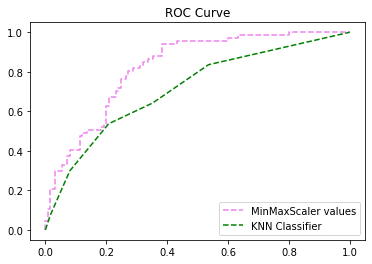

In [60]:
import matplotlib.pyplot as plt
plt.plot(fpr1,tpr1,linestyle='--',color='violet',label='MinMaxScaler values')
plt.plot(fpr2,tpr2,linestyle='--',color='green',label='KNN Classifier')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.savefig('ROC',dpi=100)
plt.show()

# step:10 [Regularization]

In [61]:
from sklearn.linear_model import LogisticRegressionCV
model1=LogisticRegressionCV(Cs=10,cv=4,penalty='l1',solver='liblinear')
model2=LogisticRegressionCV(Cs=10,cv=4,penalty='l2')

In [62]:
model1.fit(mm_X_train,y_train)
model2.fit(mm_X_train,y_train)

LogisticRegressionCV(cv=4)

In [63]:
rg_y_pred1 = model1.predict(mm_X_test)
rg_y_pred2 = model2.predict(mm_X_test)

AUC SCORE OF L1

In [64]:
from sklearn.metrics import roc_auc_score
l1_auc = roc_auc_score(y_test, rg_y_pred1)
l1_auc = (' LOR L1 MINMAX AUC', l1_auc)
l1_auc

(' LOR L1 MINMAX AUC', 0.6811940298507462)

AUC SCORE OF L2

In [65]:
from sklearn.metrics import roc_auc_score
l2_auc = roc_auc_score(y_test, rg_y_pred2)
l2_auc = (' LOR L2 MINMAX AUC', l2_auc)
l2_auc


(' LOR L2 MINMAX AUC', 0.6891940298507462)

# step:11 [Update ROC curve]

In [70]:
pred_prb7 = model1.predict_proba(mm_X_test)
pred_prb8 = model2.predict_proba(mm_X_test)

fpr,tbr,threshold = roc_curve(y_test, pred_prob1[:,1],pos_label=1)
fpr1,tbr1,threshold1 = roc_curve(y_test, pred_prob2[:,1],pos_label=1)
fpr2,tbr2,threshold2= roc_curve(y_test, pred_prb7[:,1],pos_label=1)
fpr3,tbr3,threshold3 = roc_curve(y_test, pred_prb8[:,1],pos_label=1)

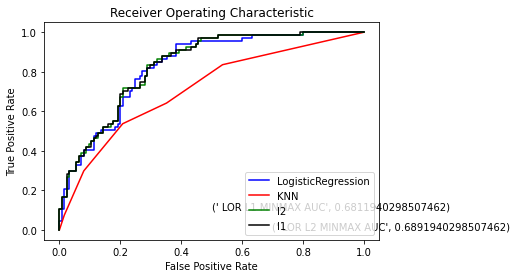

In [75]:
plt.plot(fpr, tbr, linestyle='-', color='blue', label='LogisticRegression')
plt.plot(fpr1, tbr1, linestyle='-', color='red', label='KNN')
plt.plot(fpr3, tbr3, linestyle='-', color='green', label='l2')
plt.plot(fpr2, tbr2, linestyle='-', color='black', label='l1')

plt.annotate(xy=[0.5,0.3],text= auc_ss)
plt.annotate(xy=[0.5,0.2],text= knn_auc)
plt.annotate(xy=[0.5,0.1],text= l1_auc)
plt.annotate(xy=[0.7,0],text= l2_auc)

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'best')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()